In [1]:
!pip install -q seaborn pandas scikit-learn matplotlib numpy

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

Let's first import the iris dataset

In [3]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Do some EDA and be able to answer some questions: How many classes are there in this dataset? How many features and instances? What features seem to be important and what features don't seem to be important?

Your answer here:

In [4]:
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

Petal length and pedal width look very correlated with each other, so let's graph them against eachother

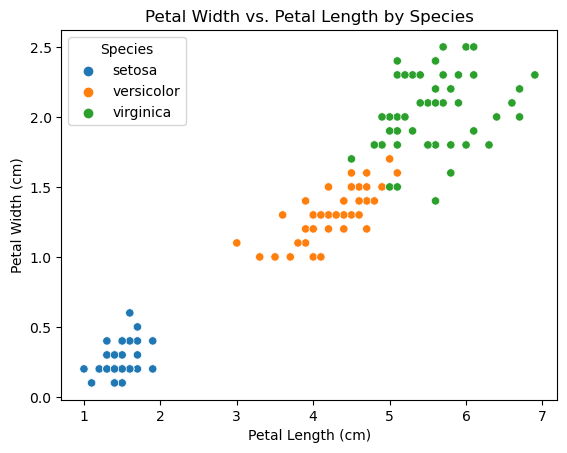

In [5]:
iris = sns.load_dataset("iris")
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Width vs. Petal Length by Species')
plt.legend(title='Species')
plt.show()

Let's focus on some simply binary classification for now, so let's drop the virginica flower and just look at trying to get a good classifier on the other two.

Are these features linearly separable? Can we get a perfect classifier on them?

Your answer here:

### Implement an SVM Classifier

In [6]:
iris_filtered = iris[iris['species'] != 'virginica']

X = iris_filtered[['petal_length', 'petal_width']].values
y = iris_filtered['species'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create an SVM classifier with a linear kernel
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# your code here

# Fit the SVM classifier to the training data
# your code here


SVC(kernel='linear')

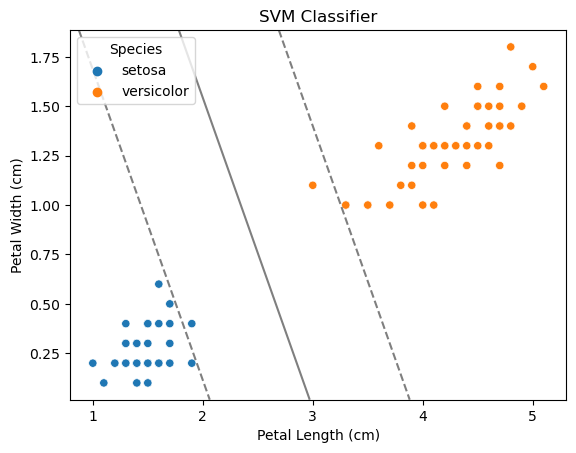

In [7]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Classifier')
plt.legend(title='Species')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.show()

### Implement a decision tree
- use veriscolor and virginica instead this time

In [8]:
iris = sns.load_dataset("iris")

iris_filtered = iris[iris['species'] != 'setosa']
X = iris_filtered[['petal_length', 'petal_width']].values
y = iris_filtered['species'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Create a Decision Tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# your code here



DecisionTreeClassifier()

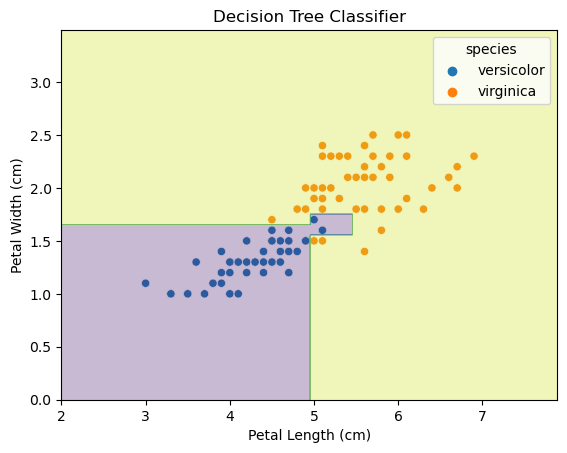

In [9]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Tree Classifier')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()


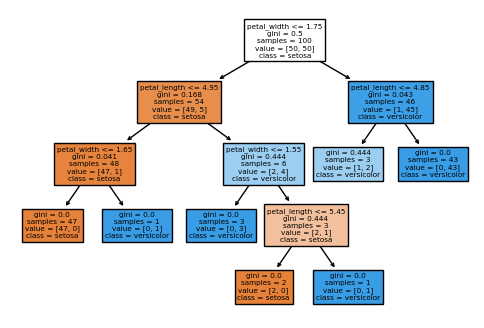

In [10]:
plt.figure(figsize=(6, 4))
plot_tree(tree_classifier, filled=True, feature_names=['petal_length', 'petal_width'], class_names=iris['species'].unique())
plt.show()

### Implement a bagging and a boosting classifier
- Use DecisionTreeClassifier as the base classifier

In [11]:
# Create a base classifier (e.g., Decision Tree)
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# your code here

# Create a BaggingClassifier using your DecisionTreeClassifier and 10 bootstrap samples
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
# your code here

bagging_classifier.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

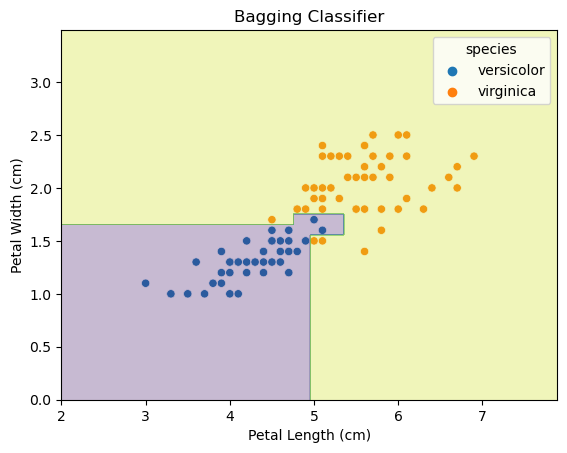

In [12]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Bagging Classifier')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = bagging_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()

In [13]:
# Create a base classifier (e.g., Decision Tree with depth 1)
# your code here

# Create an AdaBoostClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# your code here


adaboost_classifier.fit(X, y)

AdaBoostClassifier()

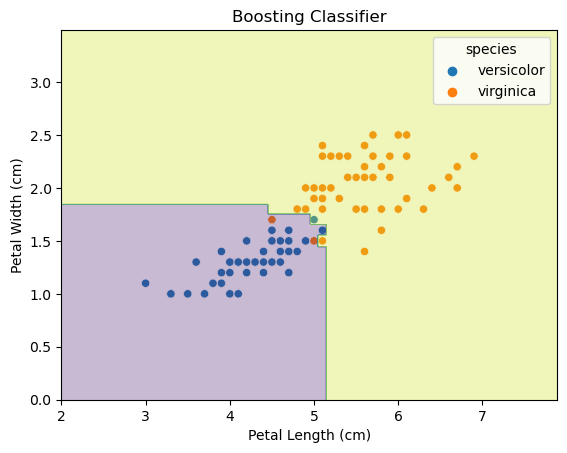

In [14]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Boosting Classifier')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = adaboost_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()

# Extension Questions
1. How many points are misclassified using the SVM approach when trained to tell versicolor and virginica apart using petal length and width?

2. What is the performance of the kmeans algorithm on separating versicolor from virginica?

In [ ]:
# create the filtered dataset that excludes setosa flowers

X = iris_filtered[[#add your attributes here ie: petal width and length]].values
y = iris_filtered[#what is the target feature we are going for?].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create an SVM classifier with a linear kernel




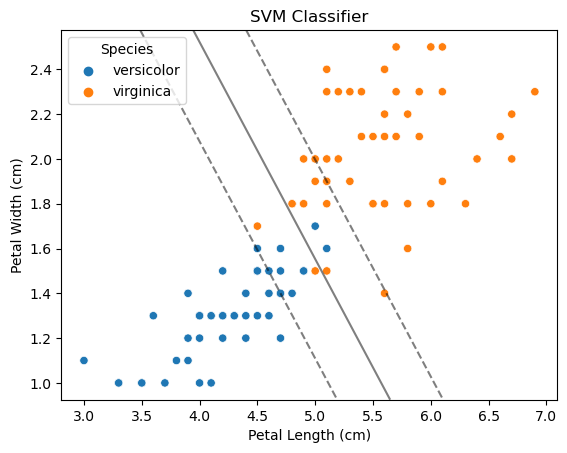

In [16]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Classifier')
plt.legend(title='Species')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.show()

In [1]:
# import kmeans from sklearn then fit it to the data then find the cluster centers

# name your kemans model "kmeans"

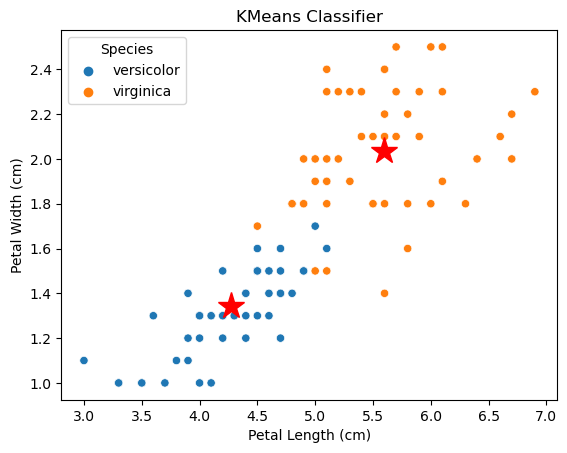

In [21]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Classifier')
plt.legend(title='Species')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


#plt.plot([2.0375,5.59583333], [1.34230769,4.26923077], marker='*', ls='none', ms=20)
plt.plot(kmeans.cluster_centers_.T[0], 
         kmeans.cluster_centers_.T[1], 
         marker='*', ls='none', ms=20,
         color="red")

plt.show()

In [22]:
# the red stars are the cluster centers